In [1]:
from tensorflow import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adam(),metrics=['accuracy'])

model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

4431872/4422102 [==============================] - 20s 5us/step
Epoch 1/5
938/938 [==============================] - 48s 48ms/step - loss: 0.4717 - accuracy: 0.8291
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.3190 - accuracy: 0.8851
Epoch 3/5
938/938 [==============================] - 47s 50ms/step - loss: 0.2772 - accuracy: 0.8988
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.2488 - accuracy: 0.9090
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.2764 - accuracy: 0.8978
Test loss 0.2764076590538025
Test accuracy 0.8978000283241272


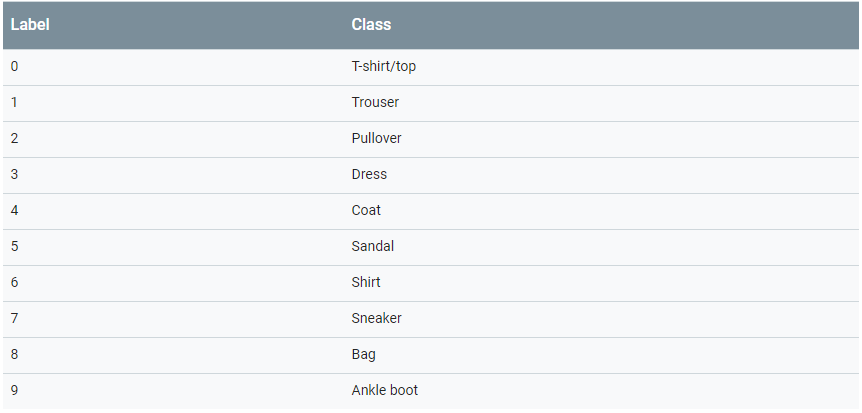

In [2]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[55])))

2


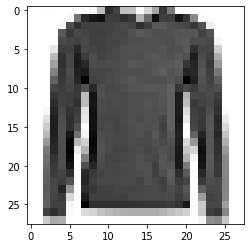

In [3]:
plt.imshow(test_X[55].reshape(28, 28), cmap = plt.cm.binary)
plt.show()